In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
tbl1 = pd.read_excel('MPG_Weight.xlsx')
tbl1

,MPG,Weight
0,28.7,2289
1,29.2,2113
2,34.2,2180
3,27.9,2448
4,33.3,2026
5,26.4,2702
6,23.9,2657
7,30.5,2106
8,18.1,3226
9,19.5,3213


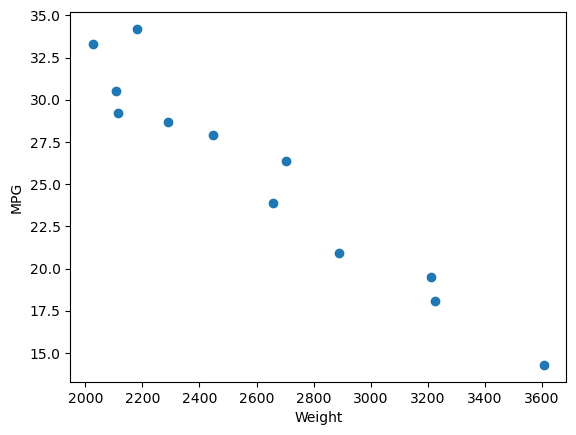

In [4]:
plt.scatter(tbl1['Weight'], tbl1['MPG'])
plt.ylabel('MPG')
plt.xlabel('Weight')
plt.show()

# __Model 1__

In [6]:
x = tbl1['Weight']
y = tbl1['MPG']
x2 = sm.add_constant(x)
model = sm.OLS(y, x2)
Model = model.fit()
print(Model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     144.8
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           2.85e-07
Time:                        11:03:31   Log-Likelihood:                -22.091
No. Observations:                  12   AIC:                             48.18
Df Residuals:                      10   BIC:                             49.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.0957      2.582     21.725      0.0

C:\Users\eli\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [7]:
E = Model.resid_pearson
E

array([-0.44511273, -1.37252481,  2.08753315,  0.18422536,  0.47540179,
        1.05668329, -0.75350063, -0.64311699, -0.25953343,  0.4879158 ,
        0.12130227, -0.93927307])

In [8]:
yhat = Model.predict(x2)
yhat

0     29.443573
1     31.492839
2     30.712721
3     27.592247
4     32.505829
5     24.634783
6     25.158743
7     31.574344
8     18.533557
9     18.684924
10    14.097361
11    22.469081
dtype: float64

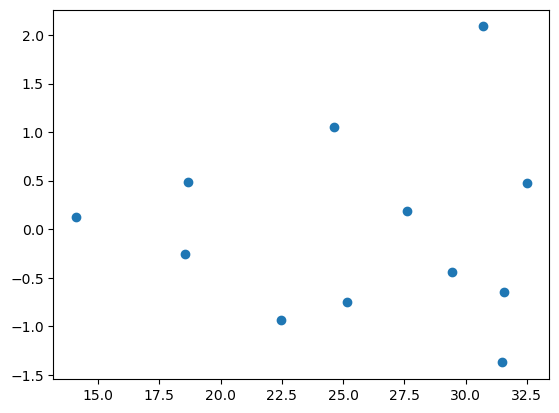

In [9]:
plt.scatter(yhat,E)
plt.show()

__This model is invalid.__

# __Model 2__

In [11]:
Y = np.log(y)

In [12]:
model2 = sm.OLS(Y,x2)
Model2 = model2.fit()
print(Model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     181.2
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           9.84e-08
Time:                        11:10:17   Log-Likelihood:                 17.005
No. Observations:                  12   AIC:                            -30.01
Df Residuals:                      10   BIC:                            -29.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5242      0.099     45.553      0.0

C:\Users\eli\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [14]:
E2 = Model2.resid_pearson
E2

array([-0.31630114, -1.42005514,  1.5623004 ,  0.48370101, -0.0537228 ,
        1.60448776, -0.29474869, -0.79674991, -0.18335787,  0.87474775,
       -0.87956572, -0.58073564])

In [16]:
yhat = Model2.predict(x2)
yhat

0     3.377221
1     3.465414
2     3.431840
3     3.297547
4     3.509009
5     3.170268
6     3.192817
7     3.468922
8     2.907694
9     2.914208
10    2.716776
11    3.077064
dtype: float64

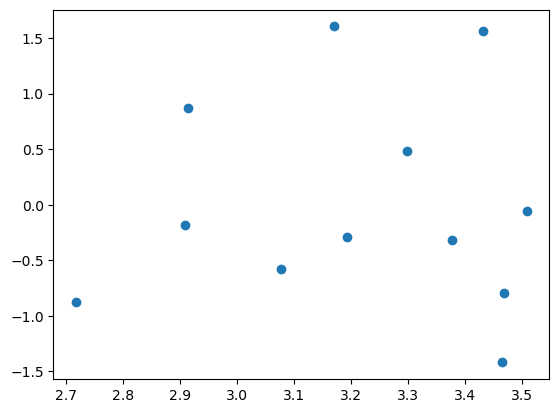

In [17]:
plt.scatter(yhat,E2)
plt.show()

__The miles-per-gallon estimate is obtained by finding the number whose natural logarithm is 3.2675.
Using a calculator with an exponential function, or raising e to the power 3.2675, we obtain 26.2 miles per gallon.__ <br>
__LogeMPG = 4.52 - 0.000501(2500) = 3.2675__